In [683]:
import numpy as np
import pandas as pd
import geopandas as gpd
import shapely
from shapely.geometry import Point
from shapely.geometry import shape 
from shapely.geometry import Polygon
from descartes import PolygonPatch
from matplotlib import pyplot
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from pprint import pprint

import cfgrib
import xarray as xr
from collections import Counter
import pickle 

## Load in Shapefiles

In [761]:
# Loading is Shapefiles of california fire perimeters
cal_fires_shape_map_path = '.../Files/Cal_fires.shp'
cal_fires_shape_map = gpd.read_file(cal_fires_shape_map_path)

# for col in cal_fires_shape_map.columns: 
#     print(col)

DriverError: .../Files/Cal_fires.shp: No such file or directory

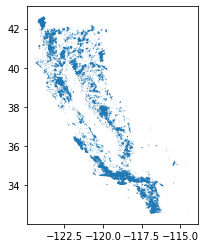

In [679]:
# Plotting perimeters
cal_fires_shape_map.plot()
plt.savefig('fire_perimeter',dpi = 300, transparent = True)

In [681]:
# Loading in eco_regions shapefiles
eco_regions_shape_map_path = 'eco_regions_qgis_l4.shp'
eco_regions_shape_map = gpd.read_file(eco_regions_shape_map_path)

# for col in eco_regions_shape_map.columns: 
#     print(col)

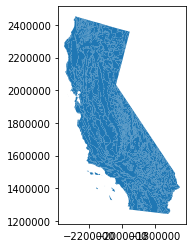

In [716]:
# PLotting ecoregion shape files
eco_regions_shape_map.plot()

## Make new dataframe with nessacary info

In [686]:
# creating dataframe with only needed infro from fire shape files
# includes date,acres burned by fire, lat and long
fire_regions = (cal_fires_shape_map['ALARM_DATE'],cal_fires_shape_map['GIS_ACRES'],cal_fires_shape_map['long'],cal_fires_shape_map['lat'])
fire_regions = pd.DataFrame(fire_regions).T

In [9]:
# creating dataframe with only needed infro from ecoregions shapefiles
# includes lat, long, ecoregion, area
eco_regions = (eco_regions_shape_map['L4_KEY'],eco_regions_shape_map['long'],eco_regions_shape_map['lat'],eco_regions_shape_map['geometry'])
eco_regions = pd.DataFrame(eco_regions).T

## Cluster eco regions into similar groups

In [418]:
#cluster all sub ecoregions into their respective ecoregions
regions = eco_regions.L4_KEY.tolist()
larger_regions = []
for region in regions:
    strin = region[:2]
    output = re.sub('\D','',strin)
    larger_regions.append(output)

In [422]:
Counter(larger_regions).keys()

dict_keys(['1', '9', '6', '7', '8', '85', '5', '4', '13', '78', '80', '14', '81'])

In [624]:
# stored for later use in EDA
pickle.dump( larger_regions, open( "eco_region_classes", "wb" ) )

In [419]:
# Make new column with larger ecoregions
eco_regions['Cluster'] = larger_regions 

In [420]:
eco_regions

,L4_KEY,long,lat,geometry,Cluster
0,1a Coastal Lowlands,-124.179,41.8383,"POLYGON ((-2286399.3671 2452520.4409, -2285964...",1
1,1a Coastal Lowlands,-124.161,40.8099,"POLYGON ((-2321491.6622 2324478.137700001, -23...",1
2,1a Coastal Lowlands,-124.168,40.8141,"POLYGON ((-2321888.195 2325364.5765, -2321882....",1
3,1a Coastal Lowlands,-124.154,40.7266,"POLYGON ((-2310140.1121 2349933.469000001, -23...",1
4,9g Klamath/Goose Lake Basins,-121.548,41.9252,POLYGON ((-2081204.627900001 2392941.701300001...,9
...,...,...,...,...,...
574,14b Eastern Mojave Low Ranges and Arid Footsl...,-116.617,34.6992,"POLYGON ((-1864625.4301 1510375.1164, -1864441...",14
575,14a Eastern Mojave Basins,-116.281,34.5509,POLYGON ((-1816173.770500001 1578193.236500001...,14
576,81i Central Sonoran/Colorado Desert Mountains,-114.478,34.3097,"POLYGON ((-1668922.9922 1413300.0705, -1669459...",81
577,81k Arizona Upland/Eastern Sonoran Mountains,-114.291,34.3123,POLYGON ((-1664407.013800001 1423895.710100001...,81


In [32]:
# Breaking down Ecoregion geometry to create graph
xs = []
ys = []
for i in range(len(eco_regions)):
    poly = eco_regions.geometry[i]
    x,y = poly.exterior.xy
    xs.append(x)
    ys.append(y)

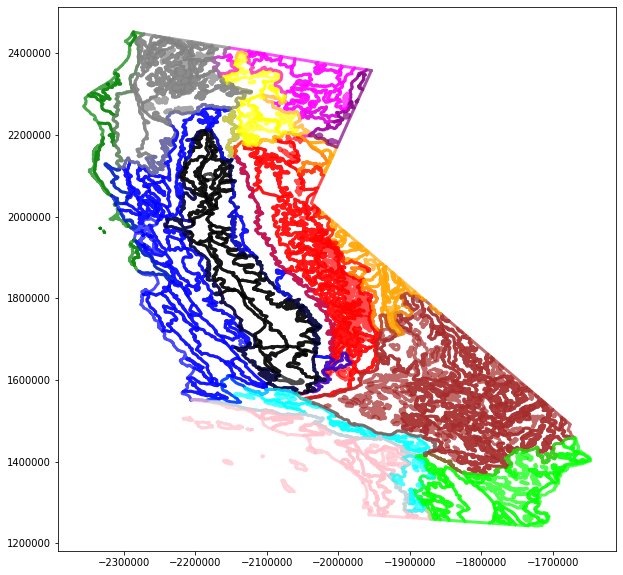

In [656]:
# plottinfg ecoRegion graph, each if/elif is too define what color teh ecoregion should be 
plt.figure(figsize=(10,10))
for i in range(len(xs)):
    x = xs[i]
    y = ys[i]
    if int(larger_regions[i]) == 1:
        plt.plot(x, y,color = 'green', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    elif int(larger_regions[i]) == 4:
         plt.plot(x, y,color = 'yellow', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    elif int(larger_regions[i]) == 5:
         plt.plot(x, y,color = 'red', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    elif int(larger_regions[i]) == 6:
         plt.plot(x, y,color = 'blue', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    elif int(larger_regions[i]) == 7:
         plt.plot(x, y,color = 'black', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    elif int(larger_regions[i]) == 8:
         plt.plot(x, y,color = 'cyan', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    elif int(larger_regions[i]) == 9:
         plt.plot(x, y,color = 'magenta', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    elif int(larger_regions[i]) == 13:
         plt.plot(x, y,color = 'orange', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    elif int(larger_regions[i]) == 14:
         plt.plot(x, y,color = 'brown', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    elif int(larger_regions[i]) == 78:
         plt.plot(x, y,color = 'gray', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    elif int(larger_regions[i]) == 80:
         plt.plot(x, y,color = 'purple', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    elif int(larger_regions[i]) == 81:
         plt.plot(x, y,color = 'lime', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    elif int(larger_regions[i]) == 85:
         plt.plot(x, y,color = 'pink', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)

## Mapping Fires to closet ecoregion

In [455]:
# creating a list of teh lats and long for ecoregions and fire data
fires_long = fire_regions.long.tolist()
fires_lat = fire_regions.lat.tolist()
eco_long = eco_regions.long.tolist()
eco_lat = eco_regions.lat.tolist()

# looking to see what ecoregion the fire is in by running a distance calc to all smaller ecoregions 
# then assiging teh larger ecoregion to the fire
indexes = []
for i in range(len(fire_regions)):
    dist = []
    for j in range(len(eco_regions)):
        # disatance calc
        distance = np.sqrt((fires_long[i]-eco_long[j])**2 + (fires_lat[i]-eco_lat[j])**2)
        dist.append(distance)
    # finds shortest distance
    index = np.argmin(dist)
    indexes.append(index)

In [456]:
# looks at the indexes and assigns ecoregion
eco_region_list = []
for i in indexes:
    eco_region = eco_regions.Cluster[indexes[i]]
    eco_region_list.append(eco_region)

In [687]:
# adds ecoregion to fire df
fire_regions['Eco_Region'] = eco_region_list

In [688]:
#assigns classes to the fire datframe based on size so that EDA can be done
# class1: 0-300
# class2: 300-100
# class3: 1000-5000
# class4: 5000+
acres = fire_regions['GIS_ACRES'].tolist()
classes = []
c1 = 0
c2 = 0
c3 =0
c4=0
for i in acres:
    if i < 300:
        index = 0
        c1 += 1
    elif i >= 300 and i < 1000:
        index = 1
        c2 += 1
    elif i >= 1000 and i < 5000:
        index = 2
        c3 += 1
    elif i >= 5000:
        index = 3
        c4 +=1
    classes.append(index)

# prints counts of each class
print(c1,c2,c3,c4)

12595 4249 2739 1237


In [689]:
fire_regions['Classes'] = classes

In [690]:
fire_regions

,ALARM_DATE,GIS_ACRES,long,lat,Eco_Region,Classes
0,2007-10-21,25.7367,-118.497,34.3816,6,0
1,2007-10-22,2824.88,-118.62,34.4051,6,2
2,2007-10-20,58410.3,-118.757,34.4992,6,3
3,2007-09-11,172.215,-118.063,34.5061,4,0
4,2007-11-24,4708,-118.748,34.0555,6,2
...,...,...,...,...,...,...
20815,2019-10-30,6.29773,-118.674,34.1509,6,0
20816,2019-10-28,8.48267,-118.695,34.1489,6,0
20817,2019-11-09,64.8882,-118.335,34.1429,6,0
20818,NaN,66.5872,-115.493,35.2705,8,0


## Number of Fires by Month and large fires by month

In [704]:
# creates list of months from fire_regions 
dates = fire_regions.ALARM_DATE
classes = fire_regions.Classes
fires_count = []
for i , j in enumerate(dates):
    try:
        fires_count.append(int(j[5:7]))
    except:
        pass

In [706]:
months = Counter(fires_count).keys() # equals to list(set(words))
counts = Counter(fires_count).values()

<BarContainer object of 12 artists>

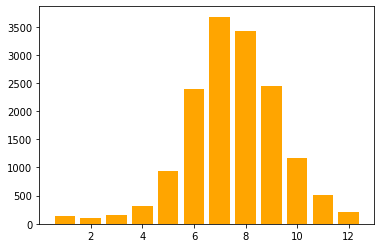

In [707]:
# distribution of fires by month
plt.bar(months, counts, color = 'orange')

In [691]:
# same as above except for only class3 fires
dates_months_class3 = []
for i , j in enumerate(dates):
    try:
        if classes[i] == 3:
            dates_months_class3.append(int(j[5:7]))
    except:
        pass

In [705]:
months3 = Counter(dates_months_class3).keys() 
counts3 = Counter(dates_months_class3).values()
print(months3, counts3)

dict_keys([10, 6, 7, 8, 9, 11, 3, 5, 1, 12, 4, 2]) dict_values([98, 112, 195, 250, 174, 34, 2, 19, 2, 12, 3, 3])


In [700]:
fire_months = ['May','June','July','August','September','October']
fire_month_counts = [19,112,195,250,174,98]

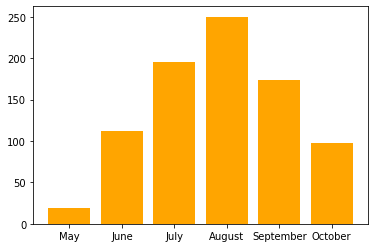

In [703]:
# looks at only fires in fire season
plt.bar(fire_months, fire_month_counts, color = 'orange')
plt.savefig('Large_Fires_by_month',dpi = 300, transparent = True)

In [459]:
print(Counter(eco_region_list).keys()) # equals to list(set(words))
print(Counter(eco_region_list).values()) # counts the elements' frequency

dict_keys(['6', '4', '78', '9', '7', '1', '85', '5', '8', '13', '14', '81', '80'])
dict_values([5610, 942, 1753, 545, 2552, 299, 3674, 3030, 1501, 288, 222, 270, 134])


## Loading in weather data

In [88]:
# loads in weather data from 2019 to 2000
weather_data = xr.load_dataset('adaptor.mars.internal-1599251095.8007843-3411-13-cf50a825-a551-41b1-93a7-89df84ec2128.grib', engine='cfgrib')

skipping variable: paramId==235055 shortName='mtpr'
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/cfgrib/dataset.py", line 602, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/opt/anaconda3/lib/python3.7/site-packages/cfgrib/dataset.py", line 538, in dict_merge
    "key=%r value=%r new_value=%r" % (key, master[key], value)
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([ 957171600,  957182400,  957193200, ..., 1572523200, 1572534000,
       1572544800])) new_value=Variable(dimensions=('time',), data=array([ 957160800,  957247200,  957333600, ..., 1572328800, 1572415200,
       1572501600]))


In [432]:
# loads in weather data from 1980 to 1999
# has temp, soil temp, u and v componets of wind
weather_data_1980 = xr.load_dataset('adaptor.mars.internal-1599416478.6048276-8334-26-680a30d6-90af-4f39-9cc4-a92dc3714ed0.grib', engine='cfgrib')

skipping variable: paramId==235055 shortName='mtpr'
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/cfgrib/dataset.py", line 602, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/opt/anaconda3/lib/python3.7/site-packages/cfgrib/dataset.py", line 538, in dict_merge
    "key=%r value=%r new_value=%r" % (key, master[key], value)
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([326019600, 326030400, 326041200, ..., 941371200, 941382000,
       941392800])) new_value=Variable(dimensions=('time',), data=array([326008800, 326095200, 326181600, ..., 941176800, 941263200,
       941349600]))


<Figure size 432x360 with 0 Axes>

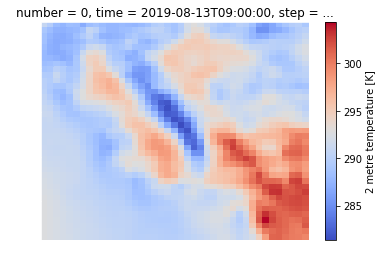

In [673]:
# plots an example of data for temp across california
plt.figure(figsize=(6,5))
fig = plt.figure()
ax = fig.add_subplot(111)
weather_data.t2m[14400].plot(cmap=plt.cm.coolwarm)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
plt.xlabel('Longitude',color = 'white')
plt.ylabel('Latitude', color = 'white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.savefig('weather_data',dpi = 300, transparent = True)

In [ ]:
# converts grib to netcdf
weather_data.to_netcdf("weather_data.nc")
weather_data_1980.to_netcdf("weather_data_1980.nc")

In [90]:
# opens up new netcdf format
weather_data_disk = xr.open_dataset("weather.nc")
weather_data_1980_disk = xr.open_dataset("weather_data_1980.nc")

In [91]:
# turns netcdf format into dataframe
weather_df = weather_data_disk.to_dataframe()
weather_df_1980 = weather_data_1980_disk.to_dataframe()

In [526]:
# combines dataframes
weather_com = pd.concat([weather_df,weather_df_1980])

In [527]:
weather_com

u10       v10         t2m  \
latitude longitude time                                                  
41.9     -124.3    2000-05-01 09:00:00 -0.827980  0.258640  284.244141   
                   2000-05-01 12:00:00 -0.773101  0.626984  283.359863   
                   2000-05-01 15:00:00 -0.945295  0.701354  285.425049   
                   2000-05-01 18:00:00  0.186873  1.694497  285.670410   
                   2000-05-02 09:00:00  0.377012  2.315939  284.338867   
...                                          ...       ...         ...   
32.4     -114.3    1999-10-30 18:00:00 -4.500496 -5.356620  298.854248   
                   1999-10-31 09:00:00 -0.287431 -2.832025  289.471191   
                   1999-10-31 12:00:00 -0.740928 -3.028546  290.206787   
                   1999-10-31 15:00:00 -0.759057 -2.671720  292.942871   
                   1999-10-31 18:00:00 -1.646583 -4.343058  300.038086   

                                              stl1          valid_time  \
latitude longitude time                                                  
41.9     -124.3    2000-05-01 09:00:00  283.338867 2000-05-01 09:00:00   
                   2000-05-01 12:00:00  282.566162 2000-05-01 12:00:00   
                   2000-05-01 15:00:00  284.324463 2000-05-01 15:00:00   
                   2000-05-01 18:00:00  285.124512 2000-05-01 18:00:00   
                   2000-05-02 09:00:00  283.864502 2000-05-02 09:00:00   
...                                            ...                 ...   
32.4     -114.3    1999-10-30 18:00:00  297.751221 1999-10-30 18:00:00   
                   1999-10-31 09:00:00  290.920654 1999-10-31 09:00:00   
                   1999-10-31 12:00:00  291.245850 1999-10-31 12:00:00   
                   1999-10-31 15:00:00  290.970703 1999-10-31 15:00:00   
                   1999-10-31 18:00:00  297.444336 1999-10-31 18:00:00   

                                        number   step  surface  \
latitude longitude time                                          
41.9     -124.3    2000-05-01 09:00:00       0 0 days        0   
                   2000-05-01 12:00:00       0 0 days        0   
                   2000-05-01 15:00:00       0 0 days        0   
                   2000-05-01 18:00:00       0 0 days        0   
                   2000-05-02 09:00:00       0 0 days        0   
...                                        ...    ...      ...   
32.4     -114.3    1999-10-30 18:00:00       0 0 days        0   
                   1999-10-31 09:00:00       0 0 days        0   
                   1999-10-31 12:00:00       0 0 days        0   
                   1999-10-31 15:00:00       0 0 days        0   
                   1999-10-31 18:00:00       0 0 days        0   

                                        depthBelowLandLayer  
latitude longitude time                                      
41.9     -124.3    2000-05-01 09:00:00                    0  
                   2000-05-01 12:00:00                    0  
                   2000-05-01 15:00:00                    0  
                   2000-05-01 18:00:00                    0  
                   2000-05-02 09:00:00                    0  
...                                                     ...  
32.4     -114.3    1999-10-30 18:00:00                    0  
                   1999-10-31 09:00:00                    0  
                   1999-10-31 12:00:00                    0  
                   1999-10-31 15:00:00                    0  
                   1999-10-31 18:00:00                    0  

[47074560 rows x 9 columns]

In [112]:
# all long and lat values from weather df
longs = [-124.3 , -124.05, -123.8 , -123.55, -123.3 , -123.05, -122.8 , -122.55,
       -122.3 , -122.05, -121.8 , -121.55, -121.3 , -121.05, -120.8 , -120.55,
       -120.3 , -120.05, -119.8 , -119.55, -119.3 , -119.05, -118.8 , -118.55,
       -118.3 , -118.05, -117.8 , -117.55, -117.3 , -117.05, -116.8 , -116.55,
       -116.3 , -116.05, -115.8 , -115.55, -115.3 , -115.05, -114.8 , -114.55,
       -114.3 ]

lats = [41.9 , 41.65, 41.4 , 41.15, 40.9 , 40.65, 40.4 , 40.15, 39.9 , 39.65,
       39.4 , 39.15, 38.9 , 38.65, 38.4 , 38.15, 37.9 , 37.65, 37.4 , 37.15,
       36.9 , 36.65, 36.4 , 36.15, 35.9 , 35.65, 35.4 , 35.15, 34.9 , 34.65,
       34.4 , 34.15, 33.9 , 33.65, 33.4 , 33.15, 32.9 , 32.65, 32.4 ]

In [123]:
# converts indiv lats and longs into a set of coords
coords = []
for long in longs:
    for lat in lats:
        coord = [lat, long]
        coords.append(coord)

## Combining Fire Data with weather data

In [465]:
# looks at weather coords and maps the fire to closet coord set
fires_long = fire_regions.long.tolist()
fires_lat = fire_regions.lat.tolist()
weather_indexes = []
for i in range(len(fire_regions)):
    dist = []
    for j in range(len(coords)):
        distance = np.sqrt((fires_long[i]-coords[j][1])**2 + (fires_lat[i]-coords[j][0])**2)
        dist.append(distance)
    index = np.argmin(dist)
    weather_indexes.append(index)

In [566]:
fire_regions_test = fire_regions
# coords[weather_indexes[1]]
# fire_coord = coords[weather_indexes[1]]
# k = weather_com.loc[fire_coord[0],fire_coord[1]]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until


In [542]:
# sort out dates that dont occur between 5-1/10-31
# also sorts out any dates before 1980
no_list = []
for i in range(len(fire_regions_test)):
    try:
        month = int(fire_regions_test.ALARM_DATE[i][5:7])
        year = int(fire_regions_test.ALARM_DATE[i][0:4])
        if month >= 5 and month <= 10 and year >= 1980 :
        #if year >= 1980 :
            pass
        else:
            no_list.append(i)
    except:
        no_list.append(i)

In [568]:
# weather df has 4 times per day, this making a list of all of those values 
time_list = [' 09:00:00', ' 12:00:00', ' 15:00:00', ' 18:00:00']
#var_list =[u10,v10,t2m,stl1]
failures = []
weather_values_list = []
for i in range(len(fire_regions_test)):
    try:
        fire_coord = coords[weather_indexes[i]] # uses index from closet lat/long pair
        loc = weather_com.loc[fire_coord[0],fire_coord[1]] # locates coords in weather df
        combs = []
        for time in time_list: # makes a list of all values for each time on a given day
            u10 = loc.loc[fire_regions.ALARM_DATE[i] + time].u10
            v10 = loc.loc[fire_regions.ALARM_DATE[i] + time].v10
            t2m = loc.loc[fire_regions.ALARM_DATE[i] + time].t2m
            stl1 = loc.loc[fire_regions.ALARM_DATE[i] + time].stl1
            comb = [u10,v10,t2m,stl1] 
            combs.append(comb) 
        weather_values_list.append(combs)
    except:
        failures.append(i)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  


In [587]:
# wt_dt[0][0][0][0]

-0.36814976

In [589]:
# takes teh list of waether values and averages the values
u10_list = []
v10_list = []
t2m_list = []
stl1_list = []
for i in range(len(wt_dt)):
    try:
        averaged_u10 = (weather_values_list[i][0][0][0] + weather_values_list[i][1][0][0] + 
                        weather_values_list[i][2][0][0] + weather_values_list[i][3][0][0])/4
        averaged_v10 = (weather_values_list[i][0][1][0] + weather_values_list[i][1][1][0] + 
                        weather_values_list[i][2][1][0] + weather_values_list[i][3][1][0])/4
        averaged_t2m = (weather_values_list[i][0][2][0] + weather_values_list[i][1][2][0] + 
                        weather_values_list[i][2][2][0] + weather_values_list[i][3][2][0])/4
        averaged_stl1 = (weather_values_list[i][0][3][0] + weather_values_list[i][1][3][0] + 
                         weather_values_list[i][2][3][0] + weather_values_list[i][3][3][0])/4
        u10_list.append(averaged_u10)
        v10_list.append(averaged_v10)
        t2m_list.append(averaged_t2m)
        stl1_list.append(averaged_stl1)
    except:
        print(i)

7572


In [592]:
#fire_regions_test.drop(7572, inplace=True)
# add all values into dataframe
fire_regions_test.reset_index(drop = True, inplace = True)
fire_regions_test['u10'] = u10_list
fire_regions_test['v10'] = v10_list
fire_regions_test['t2m'] = t2m_list
fire_regions_test['stl1'] = stl1_list

In [630]:
# save df for use in future work
fire_regions_test.to_csv('Fire_regions_w_r')

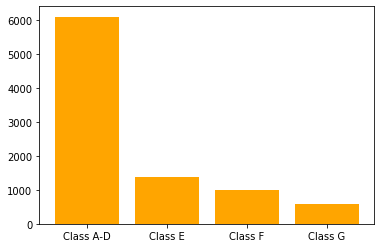

In [764]:
# plot of class ditsributions
plt.bar(['Class A-D','Class E','Class F','Class G'], [6093, 1364, 983, 575], color = 'orange')
plt.savefig('fire_class)dist',dpi = 300, transparent = True)

## Looking at weather trends by class

In [606]:
k = fire_regions_test[fire_regions_test['Classes'] == 0]
u10_0 = sum(k.u10.tolist())/len(k)
v10_0 = sum(k.v10.tolist())/len(k)
t2m_0 = sum(k.t2m.tolist())/len(k)
stl_0 = sum(k.stl1.tolist())/len(k)
k = fire_regions_test[fire_regions_test['Classes'] == 1]
u10_1 = sum(k.u10.tolist())/len(k)
v10_1 = sum(k.v10.tolist())/len(k)
t2m_1 = sum(k.t2m.tolist())/len(k)
stl_1 = sum(k.stl1.tolist())/len(k)
k = fire_regions_test[fire_regions_test['Classes'] == 2]
u10_2 = sum(k.u10.tolist())/len(k)
v10_2 = sum(k.v10.tolist())/len(k)
t2m_2 = sum(k.t2m.tolist())/len(k)
stl_2 = sum(k.stl1.tolist())/len(k)
k = fire_regions_test[fire_regions_test['Classes'] == 3]
u10_3 = sum(k.u10.tolist())/len(k)
v10_3 = sum(k.v10.tolist())/len(k)
t2m_3 = sum(k.t2m.tolist())/len(k)
stl_3 = sum(k.stl1.tolist())/len(k)

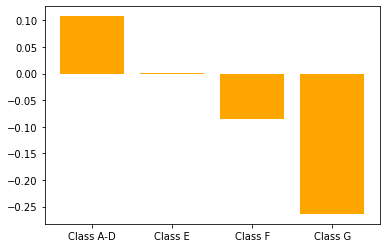

In [765]:
# average temp betweem all
#temp_list = [t2m_0,t2m_1,t2m_2,t2m_3]
temp_list = [u10_0,u10_1,u10_2,u10_3]
#temp_list = [v10_0,v10_1,v10_2,v10_3]
#temp_list = [stl_0,stl_1,stl_2,stl_3]
plt.bar(['Class A-D','Class E','Class F','Class G'],temp_list, color = 'orange')
plt.savefig('u10_weather',dpi = 300, transparent = True)